In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
data = pd.read_csv('./demo-datasets/sat_gpa.csv')

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [9]:
x = data['SAT'].values.reshape(-1, 1)
y = data['GPA'].values.reshape(-1, 1)

In [10]:
scaler = StandardScaler()

In [11]:
x = scaler.fit_transform(x, y)

### Cross-validation
To evaluate the performance of any machine learning model we need to test it on some unseen data. Based on the models performance on unseen data we can say whether our model is Under-fitting/Over-fitting/Well generalised. Cross validation is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1200px-K-fold_cross_validation_EN.svg.png"></img>
Image source: Wikipedia

### Cross-validation vs. train/test split


Advantages of cross-validation:
* More accurate estimate of out-of-sample accuracy
* Every observation is used for both training and testing

Advantages of train/test split:
* Runs K times faster than K-Fold cross-validation
* Simpler to examine the detailed results of the testing process

### Cross-validation recommendations
1. K can be any number, but __K=10__ is generally recommended.
2. For classification problems, __stratified sampling__ is recommended for creating the folds
 * Each response class should be represented with equal proportions in each of the K folds

In [59]:
len(x)

84

In [69]:
# We will set 6 splits, because our data is very limited, only 84 samples
kf = KFold(n_splits = 6, shuffle=True)

Mean R-squared: 0.292


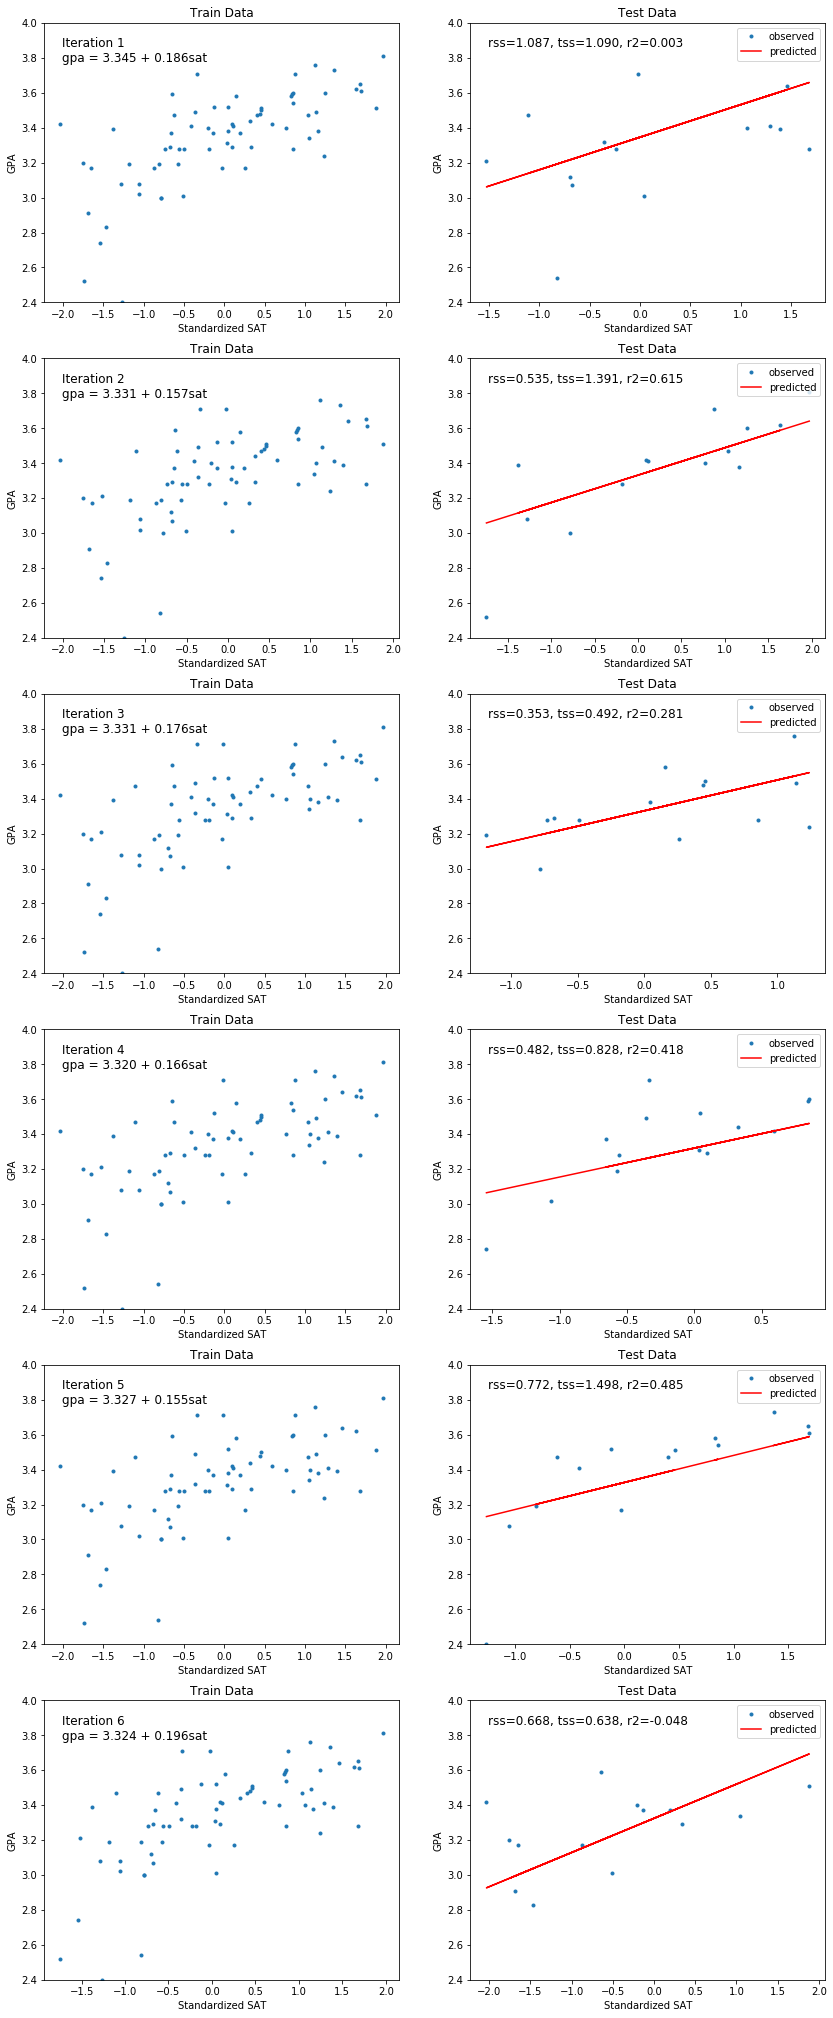

In [70]:
lr = LinearRegression()
plt.figure(figsize=(14, kf.get_n_splits() * 6))
r2 = []
for i, d in enumerate(kf.split(x, y)):
    train_idx, test_idx = d[0], d[1]
    x_train, y_train, x_test, y_test = x[train_idx], y[train_idx], x[test_idx], y[test_idx]
    
    # Show scatter plot of train data
    ax = plt.subplot(kf.get_n_splits(), 2, i * 2 + 1)
    plt.plot(x_train, y_train, '.')
    plt.xlabel('Standardized SAT')
    plt.ylabel('GPA')
    plt.ylim(y.min(), 4)
    plt.title('Train Data')
    lr.fit(x_train, y_train)
    t = '\n'.join(['Iteration {}'.format(i + 1),
                  'gpa = {:.3f} + {:.3f}sat'.format(lr.intercept_[0], lr.coef_[0][0])])
    plt.text(0.05, 0.95, t, transform=ax.transAxes, fontsize=12, verticalalignment='top')
    
    y_predicted = lr.predict(x_test)
    
    # Calculate Residual Sum of Squares (RSS) and Total Sum of Squares (TSS)
    rss = ((y_test - y_predicted)**2).sum()
    tss = ((y_test - y_test.mean())**2).sum()
    
    # Show scatter plot of predicted data
    ax = plt.subplot(kf.get_n_splits(), 2, i * 2 + 2)
    plt.plot(x_test, y_test, '.', label='observed')
    plt.plot(x_test, y_predicted, c='r', label='predicted')
    plt.xlabel('Standardized SAT')
    plt.ylabel('GPA')
    plt.ylim(y.min(), 4)
    plt.title('Test Data')
    plt.legend(loc='upper right')
    t = 'rss={:.3f}, tss={:.3f}, r2={:.3f}'.format(rss, tss, 1.0 - rss/tss)
    plt.text(0.05, 0.95, t, transform=ax.transAxes, fontsize=12, verticalalignment='top')
    
    r2.append(1.0 - rss / tss)

print('Mean R-squared: {:.3f}'.format(np.mean(r2)))